## Observations and Insights 

In [379]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
#len(mouse_metadata)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [380]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [381]:
# Combine the data into a single dataset
combined = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer')
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [382]:
# Checking the number of mice in the DataFrame.
mouse_num = combined["Mouse ID"].value_counts()
mouse_num

g989    13
k210    10
z795    10
f545    10
e662    10
        ..
f932     1
n482     1
d133     1
t573     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [383]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
ID_Timepoint_df = combined[["Mouse ID", "Timepoint"]]
IDTime_dup = ID_Timepoint_df
IDTime_dup = IDTime_dup[IDTime_dup.duplicated(["Mouse ID","Timepoint"], keep=False)]
IDTime_dup

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [384]:
# Optional: Get all the data for the duplicate mouse ID. 


In [385]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = combined[combined["Mouse ID"] != "g989"]
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [386]:
# Checking the number of mice in the clean DataFrame.
len(clean["Mouse ID"].unique())

248

## Summary Statistics

In [387]:
mean = clean.groupby("Drug Regimen").mean()
meantumor = mean["Tumor Volume (mm3)"]
meantumor

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [388]:
median = clean.groupby("Drug Regimen").median()
mediantumor = median["Tumor Volume (mm3)"]
mediantumor

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [389]:
variance = clean.groupby("Drug Regimen").var()
vartumor = variance["Tumor Volume (mm3)"]

In [390]:
std = clean.groupby("Drug Regimen").std()
stdtumor = std["Tumor Volume (mm3)"]

In [391]:
SEM = clean.groupby("Drug Regimen").sem()
SEMtumor = SEM["Tumor Volume (mm3)"]
SEMtumor

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [392]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
new = pd.DataFrame({"Mean":meantumor, "Median":mediantumor, "Variance":vartumor, "Standard Deviation":stdtumor, "SEM":SEMtumor})
new

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [393]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleangroup = clean.groupby("Drug Regimen")
aggcleangroup = cleangroup.agg({"Tumor Volume (mm3)":["mean", "median", "var","std", "sem"]})
aggcleangroup
# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

In [394]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#DR_group = clean.groupby("Drug Regimen")
DR_groupcount = clean["Drug Regimen"].value_counts()
DR_groupcount

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


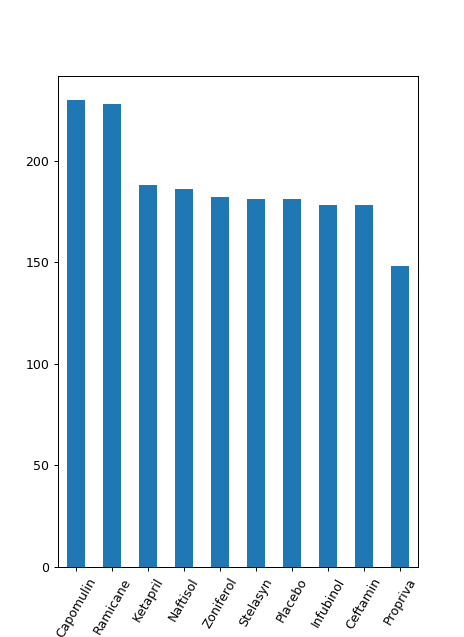

In [432]:
# nmice = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
# index = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
# df = pd.DataFrame({'Number of Mice': nmice}, index=index)
# bplot = df.plot.bar(rot=60)
plt.figure(figsize=(5,3.5))
DR_groupcount.plot(kind='bar', rot=60)


In [397]:
miceby_timepointinDR = pd.DataFrame(DR_group["Timepoint"].value_counts())
miceby_timepointinDR = miceby_timepointinDR.rename(
    columns={"Timepoint":"Number of Mice"})
miceby_timepointinDR.head(20)

,,Number of Mice
Timepoint,Timepoint,
0,0,248
5,5,236
10,10,221
15,15,205
20,20,193
25,25,182
30,30,170
35,35,153
40,40,142


In [398]:
# miceby_timepointinDRgroup = miceby_timepointinDR[["Timepoint", "Number of Mice"]]
# miceby_timepointinDRgroup = miceby_timepointinDRgroup.set_index("Drug Regimen")
# miceby_timepointinDRgroup.plot(kind="bar", figsize=(20,3))
# #plt.show()

In [399]:
DR_group = clean.groupby("Timepoint")
miceby_timepointinDR = pd.DataFrame(DR_group["Drug Regimen"].value_counts())
miceby_timepointinDR = miceby_timepointinDR.rename(
    columns={"Drug Regimen":"Number of Mice"})
miceby_timepointinDR.head(20)

Number of Mice
Timepoint Drug Regimen                
0         Capomulin                 25
          Ceftamin                  25
          Infubinol                 25
          Ketapril                  25
          Naftisol                  25
          Placebo                   25
          Ramicane                  25
          Zoniferol                 25
          Propriva                  24
          Stelasyn                  24
5         Capomulin                 25
          Infubinol                 25
          Ramicane                  25
          Placebo                   24
          Zoniferol                 24
          Ketapril                  23
          Naftisol                  23
          Propriva                  23
          Stelasyn                  23
          Ceftamin                  21

In [400]:
TP_groupcount = clean["Timepoint"].value_counts()
TP_groupcount

0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64

<IPython.core.display.Javascript object>


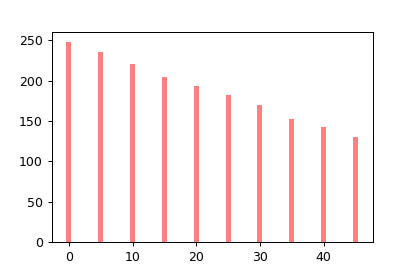

<BarContainer object of 10 artists>

In [435]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot. 
x_axis = np.arange(0, 50, 5)
x_axis
plt.figure(figsize=(5,3))
#tick_locations = [value for value in x_axis]
plt.bar(x_axis, TP_groupcount, color='r', alpha=0.5, align="center")

## Pie Plots

In [402]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = clean.groupby("Sex")
micesex = pd.DataFrame(sex_group["Mouse ID"].nunique())
micesex = micesex.rename(
    columns={"Mouse ID":"Number by Sex"})
micesex.head(10)

,Number by Sex
Sex,
Female,123
Male,125


<IPython.core.display.Javascript object>


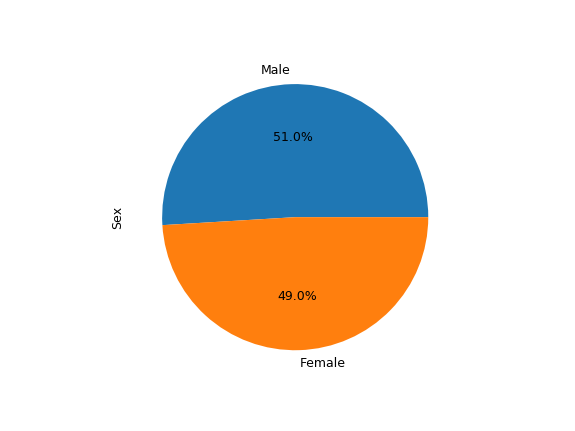

In [407]:
# df = pd.DataFrame({'Number by Sex': [123 , 125]},
#                   index=['Female', 'Male'])
# plot = df.plot.pie(y='Number by Sex', figsize=(8, 6))
counts = clean["Sex"].value_counts()
counts.plot(kind='pie',autopct="%1.1f%%")

In [339]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

<IPython.core.display.Javascript object>


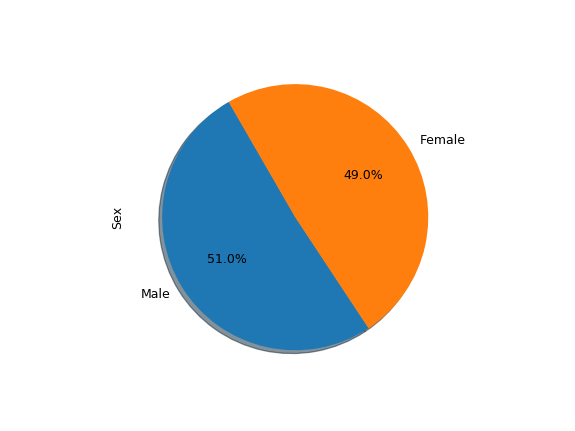

In [408]:
plt.pie(counts.values,labels=counts.index.values, autopct="%1.1f%%", shadow=True, startangle=120)
plt.ylabel("Sex")
plt.show()

# sex = ["Female", "Male"]
# sex_counts = [123,125]
# colors = ["yellow","green"]
# explode = (0.1,0)
# plt.pie(sex_counts, explode=explode, labels=sex, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=120)
# # Create axes which are equal so we have a perfect circle
# plt.axis("equal")
# # Save an image of our chart and print the final product to the screen
# plt.show()

## Quartiles, Outliers and Boxplots

In [409]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
maxclean = clean.groupby(["Mouse ID"]).max()
maxclean

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,45.000000,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [410]:
maxcleannew = maxclean.reset_index()
maxcleannew

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,45.000000,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [411]:
maxcleanmerge = maxcleannew[["Mouse ID","Timepoint"]].merge(clean, on=["Mouse ID","Timepoint"], how='left')
maxcleanmerge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [412]:
capomulin = maxcleanmerge.loc[maxcleanmerge["Drug Regimen"]=="Capomulin"]
capomulin = capomulin["Tumor Volume (mm3)"]
#capomulin

<IPython.core.display.Javascript object>


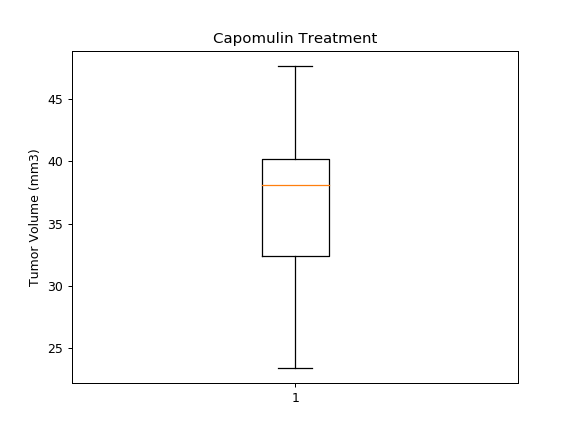

In [413]:
fig1,ax1 = plt.subplots()
ax1.set_title('Capomulin Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin)
plt.show()

In [414]:
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


<IPython.core.display.Javascript object>


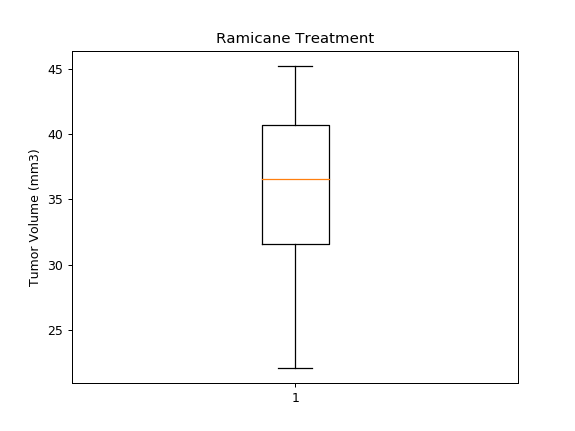

In [417]:
Ramicane = maxcleanmerge.loc[maxcleanmerge["Drug Regimen"]=="Ramicane"]
Ramicane = Ramicane["Tumor Volume (mm3)"]
Ramicane
fig1,ax1 = plt.subplots()
ax1.set_title('Ramicane Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Ramicane)
plt.show()

In [418]:
quartiles = Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


<IPython.core.display.Javascript object>


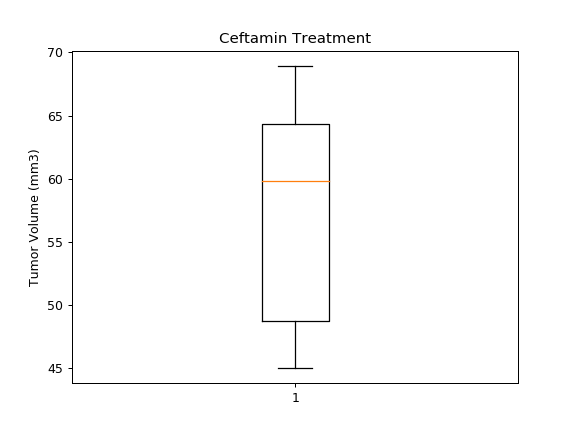

In [419]:
Ceftamin = maxcleanmerge.loc[maxcleanmerge["Drug Regimen"]=="Ceftamin"]
Ceftamin = Ceftamin["Tumor Volume (mm3)"]
Ceftamin
fig1,ax1 = plt.subplots()
ax1.set_title('Ceftamin Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Ceftamin)
plt.show()

In [420]:
quartiles = Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [421]:
Infubinol = maxcleanmerge.loc[maxcleanmerge["Drug Regimen"]=="Infubinol"]
Infubinol = Infubinol["Tumor Volume (mm3)"]
#Infubinol

<IPython.core.display.Javascript object>


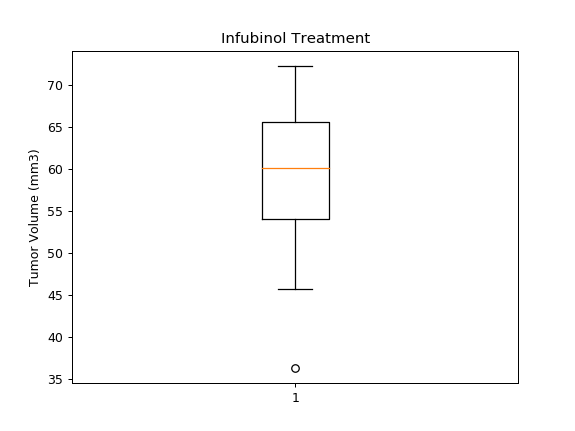

In [422]:
fig1,ax1 = plt.subplots()
ax1.set_title('Infubinol Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Infubinol)
plt.show()

In [423]:
quartiles = Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


## Line and Scatter Plots

<IPython.core.display.Javascript object>


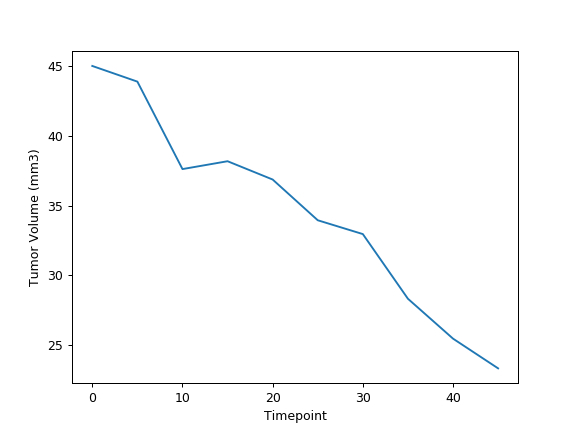

Text(0, 0.5, 'Tumor Volume (mm3)')

In [424]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulinmouse = clean.loc[clean["Drug Regimen"]=="Capomulin"]
capomulinmouse
capomulinmouse = capomulinmouse.loc[capomulinmouse["Mouse ID"]=="s185"]
capomulinmouse
plt.plot(capomulinmouse["Timepoint"],capomulinmouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

<IPython.core.display.Javascript object>


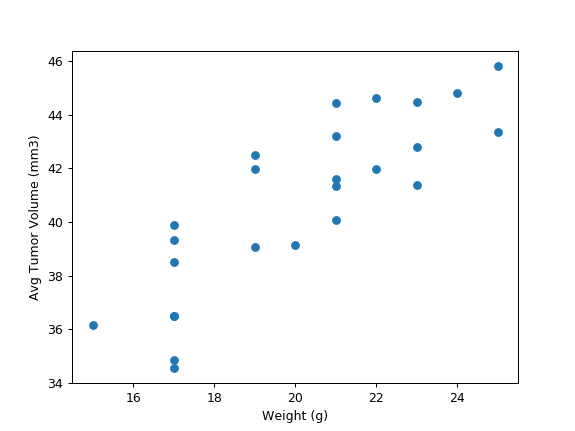

In [425]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
meanclean = clean.groupby(["Mouse ID"]).mean()
meanclean = meanclean.rename(
    columns={"Tumor Volume (mm3)":"Avg Tumor Volume (mm3)"})
meanclean = meanclean.reset_index()
meanclean
maxcleannewindex = maxcleannew[["Mouse ID", "Drug Regimen"]].merge(meanclean, on=["Mouse ID"], how='left')
maxcleannewindex
capomaxcleannewindex = maxcleannewindex.loc[maxcleannewindex["Drug Regimen"]=="Capomulin"]
capomaxcleannewindex
plt.scatter(capomaxcleannewindex['Weight (g)'],capomaxcleannewindex['Avg Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [426]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomaxcleannewindex['Weight (g)']
volume = capomaxcleannewindex['Avg Tumor Volume (mm3)']
correlation = st.pearsonr(weight,volume)
correlation

(0.8419363424694717, 1.322572243471279e-07)

In [427]:
print(f"The correlation coefficient between weight and average tumor volume is {round(st.pearsonr(weight,volume)[0],2)}")

The correlation coefficient between weight and average tumor volume is 0.84


The linear equation is: y = 0.95x + 21.55


<IPython.core.display.Javascript object>


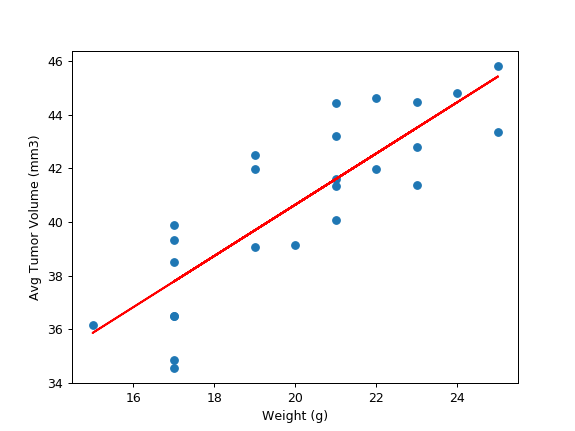

The r-squared is: 0.7088568047708717


In [428]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear equation is: {line_eq}")
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(15,10),fontsize=15,color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()